In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os

%matplotlib inline

In [26]:
# Data Directory
data_loc = "Resources"

# Output Directory
output_data_loc = "Output"

# Data File (CSV)
data_file_path = f"{data_loc}/spotify_dataset.csv"

# Read into DataFrame
data_df = pd.read_csv(data_file_path)

data_df.count()

Index                        1556
Highest Charting Position    1556
Number of Times Charted      1556
Week of Highest Charting     1556
Song Name                    1556
Streams                      1556
Artist                       1556
Artist Followers             1556
Song ID                      1556
Genre                        1556
Release Date                 1556
Weeks Charted                1556
Popularity                   1556
Danceability                 1556
Energy                       1556
Loudness                     1556
Speechiness                  1556
Acousticness                 1556
Liveness                     1556
Tempo                        1556
Duration (ms)                1556
Valence                      1556
Chord                        1556
dtype: int64

In [27]:
# Update any blank cells to be nan so the rows can be dropped - we only want records with all the metrics intact
data_df.replace("", np.nan, inplace=True)
data_df.replace(" ", np.nan, inplace=True)

# Delete any records with null values
data_df = data_df.dropna()

data_df.count()



Index                        1545
Highest Charting Position    1545
Number of Times Charted      1545
Week of Highest Charting     1545
Song Name                    1545
Streams                      1545
Artist                       1545
Artist Followers             1545
Song ID                      1545
Genre                        1545
Release Date                 1545
Weeks Charted                1545
Popularity                   1545
Danceability                 1545
Energy                       1545
Loudness                     1545
Speechiness                  1545
Acousticness                 1545
Liveness                     1545
Tempo                        1545
Duration (ms)                1545
Valence                      1545
Chord                        1545
dtype: int64

In [28]:
#data_df.loc[data_df['Song Name'] == 'NOT SOBER (feat. Polo G & Stunna Gambino)']

# Render
data_df.head()

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb


In [30]:
data_df.shape

(1545, 23)

In [58]:
# Separate out genres so there is one per record

# copy the data into a new set to manipulate for genre
genre_df = data_df.copy()

# Convert from object to string
genre_df['Genre']=genre_df['Genre'].astype(str)

# Find records that have no Genres and set them to 0
genre_df.loc[genre_df["Genre"] == "[]", "Genre"] = np.nan
genre_df["Genre"] = genre_df["Genre"].fillna(0)

# Remove unneccessary characters
genre_df["Genre"] = genre_df["Genre"].str.replace("[", "", regex=True)
genre_df["Genre"] = genre_df["Genre"].str.replace("]", "", regex=True)
genre_df["Genre"] = genre_df["Genre"].str.replace("'", "", regex=True)

# Split on commas
genre_df["Genre"] = genre_df["Genre"].str.split(",")

# separte and create rows based on genres. There will now be a row for each 
# genre a given song has so we can easily create charts based on genre
genre_df = genre_df.explode('Genre')

# Render
genre_df.head()
#genre_df.columns

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,italian pop,...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,pop,...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,pop,...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B


array([<AxesSubplot:>], dtype=object)

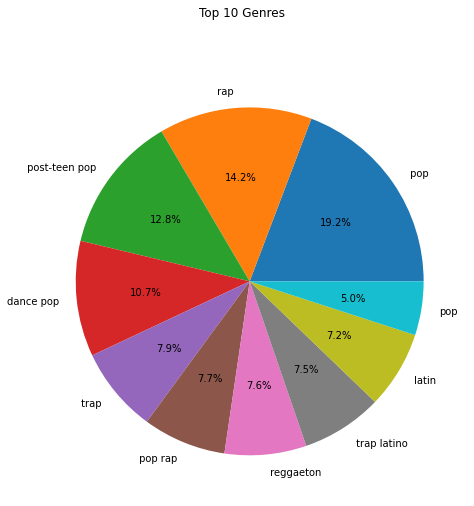

In [64]:
# Genereate pie chart for top 10 most popular genres
genre_df['Genre'].value_counts()[:10].plot.pie(subplots=True, 
                                               ylabel="", 
                                               title="Top 10 Genres", 
                                               autopct='%1.1f%%', 
                                               figsize=(8,8))


In [60]:
# Check the types - what do we need to convert for processing?
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1545 non-null   int64 
 1   Highest Charting Position  1545 non-null   int64 
 2   Number of Times Charted    1545 non-null   int64 
 3   Week of Highest Charting   1545 non-null   object
 4   Song Name                  1545 non-null   object
 5   Streams                    1545 non-null   object
 6   Artist                     1545 non-null   object
 7   Artist Followers           1545 non-null   object
 8   Song ID                    1545 non-null   object
 9   Genre                      1545 non-null   object
 10  Release Date               1545 non-null   object
 11  Weeks Charted              1545 non-null   object
 12  Popularity                 1545 non-null   object
 13  Danceability               1545 non-null   object
 14  Energy  

In [91]:
#Popularity
popularity_df = data_df.copy()
popularity_df['Popularity']=popularity_df['Popularity'].astype(int)


In [92]:
# Remove all songs with 0 popularity
idxs = popularity_df[popularity_df['Popularity']==0].index
popularity_df.drop(idxs, inplace=True)
popularity_df.loc[popularity_df['Popularity']==0]

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord


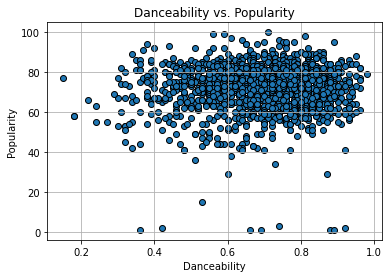

In [85]:
#Popularity vs. Danceability

popularity_df['Danceability']=popularity_df['Danceability'].astype(float).round(2)

# Scatter plot with border around marker
plt.scatter(popularity_df["Danceability"], popularity_df["Popularity"], edgecolors='k')

# Label
plt.title(f"Danceability vs. Popularity")
plt.ylabel("Popularity")
plt.xlabel("Danceability")
plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Danceability_vs_Popularity.png")

# Show plot
plt.show()

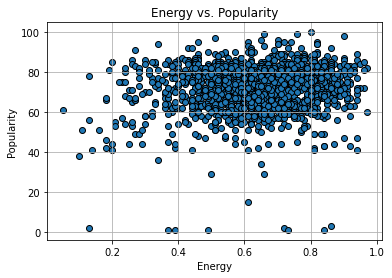

In [86]:
#Popularity vs. Energy

popularity_df['Energy']=popularity_df['Energy'].astype(float).round(2)

# Scatter plot with border around marker
plt.scatter(popularity_df["Energy"], popularity_df["Popularity"], edgecolors='k')

# Label
plt.title(f"Energy vs. Popularity")
plt.ylabel("Popularity")
plt.xlabel("Energy")
plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Energy_vs_Popularity.png")

# Show plot
plt.show()

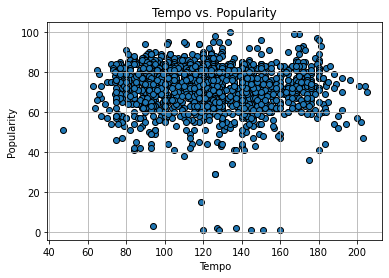

In [87]:
#Popularity vs. Tempo

popularity_df['Tempo']=popularity_df['Tempo'].astype(float).round(0)

# Scatter plot with border around marker
plt.scatter(popularity_df["Tempo"], popularity_df["Popularity"], edgecolors='k')

# Label
plt.title(f"Tempo vs. Popularity")
plt.ylabel("Popularity")
plt.xlabel("Tempo")
plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Tempo_vs_Popularity.png")

# Show plot
plt.show()

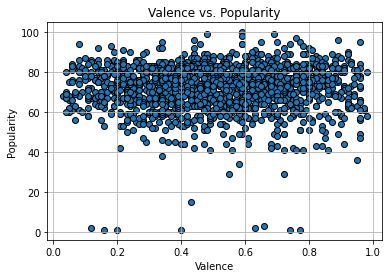

In [88]:
#Popularity vs. Valence

popularity_df['Valence']=popularity_df['Valence'].astype(float).round(2)

# Scatter plot with border around marker
plt.scatter(popularity_df["Valence"], popularity_df["Popularity"], edgecolors='k')

# Label
plt.title(f"Valence vs. Popularity")
plt.ylabel("Popularity")
plt.xlabel("Valence")
plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Valence_vs_Popularity.png")

# Show plot
plt.show()

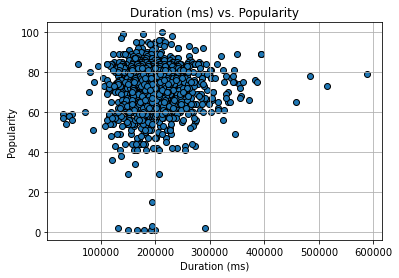

In [89]:
#Popularity vs. Duration (ms)

popularity_df['Duration (ms)']=popularity_df['Duration (ms)'].astype(int)

# Scatter plot with border around marker
plt.scatter(popularity_df["Duration (ms)"], popularity_df["Popularity"], edgecolors='k')

# Label
plt.title(f"Duration (ms) vs. Popularity")
plt.ylabel("Popularity")
plt.xlabel("Duration (ms)")
plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Duration_vs_Popularity.png")

# Show plot
plt.show()

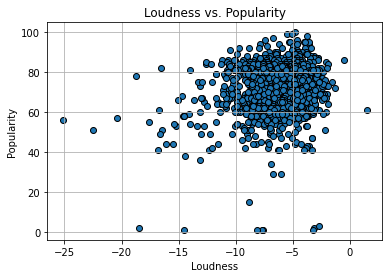

In [90]:
#Popularity vs. Loudness

popularity_df['Loudness']=popularity_df['Loudness'].astype(float).round(2)

# Scatter plot with border around marker
plt.scatter(popularity_df["Loudness"], popularity_df["Popularity"], edgecolors='k')

# Label
plt.title(f"Loudness vs. Popularity")
plt.ylabel("Popularity")
plt.xlabel("Loudness")
plt.grid(True)

# Save to image file
#plt.savefig(f"{output_data_loc}/Loudness_vs_Popularity.png")

# Show plot
plt.show()